In [19]:
import pickle
import numpy as np
#
# Load np arrays (stored in a pickle file) from disk
#
pipeline_id = "A652_E-N_EI"
file = open("../data/datasets/" + pipeline_id + ".pickle", 'rb')
(X_train, y_train,  
 X_val, y_val,  
 X_test, y_test) = pickle.load(file)

In [11]:
def check_nans(X):
    n = 0
    for i in range(len(X)):
        if np.isnan(X[i]).any():
#             print(i)
            n += 1
    print("===")
    print(f"{n}/{len(X)}")

check_nans(X_train)
check_nans(X_val)
check_nans(X_test)

===
0/13468
===
0/3402
===
0/1841


In [27]:
X_train.shape, y_train.shape

((13438, 6, 23), (13438, 1))

In [30]:
X_train.reshape(X_train.shape[0], -1).shape

(13438, 138)

In [31]:
X_train2D = X_train.reshape(X_train.shape[0], -1)
X_train2D[0]

array([0.28270042, 0.42532468, 0.88043478, 0.55298955, 0.49021567,
       0.0669873 , 0.75      , 0.        , 0.47084295, 0.77661105,
       0.34322122, 0.65790253, 0.61430599, 0.4604812 , 0.63507115,
       0.47572388, 0.56098719, 0.45890779, 0.49150801, 0.55432072,
       0.40529632, 0.91846377, 0.51415201, 0.28691983, 0.42532468,
       0.85869565, 0.5116869 , 0.49479697, 0.14644661, 0.85355339,
       0.        , 0.45943257, 0.78837189, 0.33323012, 0.57246987,
       0.44336747, 0.4589551 , 0.58158016, 0.51030118, 0.5824785 ,
       0.40450517, 0.49478917, 0.44937618, 0.40798718, 0.92429734,
       0.53827394, 0.32911392, 0.4025974 , 0.7826087 , 0.52077741,
       0.3106947 , 0.25      , 0.9330127 , 0.        , 0.43550781,
       0.77795329, 0.33897863, 0.46064091, 0.31694858, 0.46785991,
       0.63055932, 0.58626187, 0.65398988, 0.43364828, 0.51080056,
       0.59459122, 0.38855501, 0.90917683, 0.53960404, 0.29957806,
       0.36038961, 0.84782609, 0.53799411, 0.38369531, 0.37059

In [32]:
max_value_twod_row = np.amax(X_train2D, axis = 1)
max_value_twod_col = np.amax(X_train2D, axis = 0)

print("Row wise maximum: ", max_value_twod_row)
print("Column wise maximum: ", max_value_twod_col)

Row wise maximum:  [1.         1.         0.98296291 ... 0.85355339 1.         1.        ]
Column wise maximum:  [1.         0.98376623 1.         0.9256309  1.         1.
 1.         0.61842105 0.98662084 0.97717549 0.99605977 1.
 1.         0.95996416 0.99561211 0.96795791 0.94204832 0.99029426
 0.98506261 0.96797863 0.97064114 0.99302525 0.91237017 1.
 1.         1.         0.98535808 1.         1.         1.
 0.61842105 0.99798394 0.98430862 0.99164965 0.99504111 1.
 0.98074118 1.         0.96990688 0.98291237 0.98561348 0.99393115
 1.         0.97224847 1.         0.90609005 0.92827004 1.
 1.         0.96734103 1.         1.         1.         0.61513158
 1.         0.99232817 1.         0.95665503 1.         0.99746457
 0.99509656 0.98112446 1.         0.97544255 1.         0.96797863
 0.97064114 1.         0.96310261 0.94514768 0.99675325 1.
 0.97720432 1.         1.         1.         1.         0.99413499
 0.99232817 1.         0.93340244 1.         1.         0.99561211
 0.98

In [33]:
min(y_train), max(y_train)

(array([0.]), array([60.8]))

In [12]:
import sys 
import os
sys.path.append(os.path.abspath("../src"))
import utils

from utils.model import NetOrdinalClassification
import torch

NUM_FEATURES = X_train.shape[2]
print(NUM_FEATURES)

NUM_CLASSES = 5

# see https://pytorch.org/tutorials/beginner/saving_loading_models.html
model = NetOrdinalClassification(in_channels=NUM_FEATURES, num_classes=NUM_CLASSES)
model.load_state_dict(torch.load('../models/best_' + pipeline_id + '.pt'))
model.eval()

y_pred = model.predict(X_test)

23
Evaluating ordinal classification model...


In [35]:
y_pred.shape

(1832, 1)

In [15]:
X_test.shape

(963, 6, 23)

In [36]:
y_test.shape

(1832, 1)

In [13]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [14]:
min(y_pred), max(y_pred), min(y_test), max(y_test)

(array([0]), array([1]), array([0.]), array([64.4]))

In [38]:
y_test.ravel().shape

(1832,)

In [20]:
import pandas as pd
true_value = pd.Series(y_test.ravel())
pred_value = pd.Series(y_pred.ravel())

df = pd.DataFrame()
df['true_value'] = true_value
df['pred_value'] = pred_value

df[df.true_value>30].head(50)

true_value  pred_value
497         60.4           0
498         30.4           1
1234        64.4           0
1235        35.6           0
1324        34.2           0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   true_value  1832 non-null   float64
 1   pred_value  1832 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 28.8 KB


In [42]:
df.describe()

true_value   pred_value
count  1832.000000  1832.000000
mean      0.899236    -0.757096
std       3.139926     0.598062
min       0.000000    -1.000000
25%       0.000000    -1.000000
50%       0.000000    -1.000000
75%       0.600000    -1.000000
max      64.400000     1.000000

<AxesSubplot: >

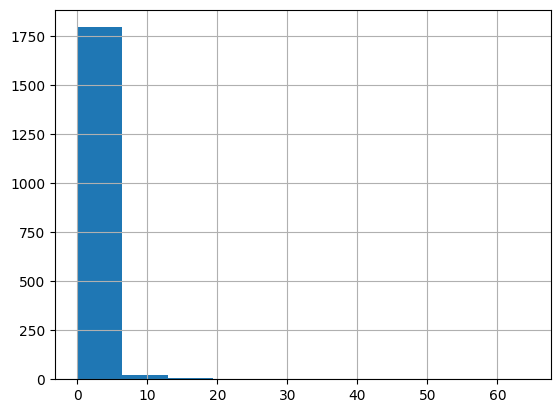

In [46]:
df.true_value.hist()

<AxesSubplot: >

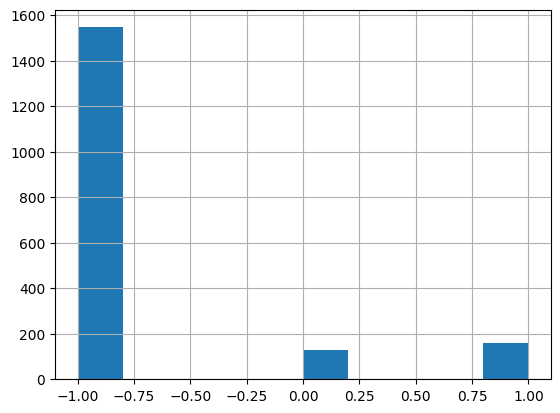

In [44]:
df.pred_value.hist()

In [45]:
df.pred_value.unique()

array([ 1,  0, -1])

In [75]:
np.isnan(X_test).any(), np.isnan(y_test).any()

(True, False)

In [79]:
X_test.shape

(1832, 6, 23)

In [80]:
len(X_test)

1832

In [77]:
X_test[0].shape

(6, 23)

In [39]:
def predict(model, X):
    print('Evaluating ordinal classification model...')
    model.eval()
    
    print("X")
    print("Test X for NaN...", np.isnan(X).any())
    print(f"X.shape: {X.shape}")
    print(X[1:2])
    
    test_x_tensor = torch.from_numpy(X.astype('float64'))
    test_x_tensor = torch.permute(test_x_tensor, (0, 2, 1))

    outputs = []
    with torch.no_grad():
        output = model(test_x_tensor.float())
        print("output:")
        print(output.shape)
        print(output)
#         print(min(output), max(output))

        yb_pred_encoded = output.detach().cpu().numpy()
        print("yb_pred_encoded:")
        print(yb_pred_encoded)
        
        yb_pred_decoded = ordinalencoding2labels(yb_pred_encoded)
        print("yb_pred_decoded:")
        print(yb_pred_decoded)

        outputs.append(yb_pred_decoded.reshape(-1,1))
    
    y_pred = np.vstack(outputs)

    return y_pred, yb_pred_encoded

def ordinalencoding2labels(pred: np.ndarray):
    """Convert ordinal predictions to class labels, e.g.
    
    [0.9, 0.1, 0.1, 0.1] -> 0
    [0.9, 0.9, 0.1, 0.1] -> 1
    [0.9, 0.9, 0.9, 0.1] -> 2
    etc.
    """
    return (pred > 0.5).cumprod(axis=1).sum(axis=1) - 1

y_pred, yb_pred_encoded = predict(model, X_test)

Evaluating ordinal classification model...
X
Test X for NaN... False
X.shape: (1342, 6, 23)
[[[0.21182266 0.62030075 0.93055556 0.36479482 0.30236346 0.14644661
   0.14644661 0.         0.59043108 0.77506042 0.34062759 0.14990378
   0.40910499 0.66818684 0.76963175 0.5587392  0.28812447 0.4266994
   0.68511272 0.8123057  0.14637602 0.52047459 0.44482548]
  [0.20689655 0.59398496 0.93055556 0.3927327  0.28686532 0.0669873
   0.25       0.         0.56208009 0.78103981 0.34531134 0.16261517
   0.38763785 0.64373949 0.76740918 0.56345411 0.28031933 0.44366367
   0.68787267 0.81213508 0.15889498 0.50709264 0.44476408]
  [0.18719212 0.56766917 0.93055556 0.31278062 0.3080461  0.01703709
   0.37059048 0.         0.55292027 0.77626091 0.3526781  0.1658861
   0.35922546 0.63536968 0.7963642  0.55806038 0.27177588 0.46270552
   0.68402057 0.82473966 0.17331935 0.5357004  0.43739696]
  [0.17241379 0.55263158 0.94444444 0.35485222 0.28024573 0.
   0.5        0.         0.52435133 0.80248874 0.344

In [40]:
yb_pred_encoded

array([[9.9996841e-01, 4.2025536e-01, 3.4177799e-02, 2.1145166e-05,
        2.9084302e-05],
       [9.9998856e-01, 5.4397184e-01, 3.5547167e-02, 1.0539840e-05,
        1.0746836e-05],
       [9.9998951e-01, 5.5737972e-01, 3.5859182e-02, 9.9810668e-06,
        9.8397932e-06],
       ...,
       [9.9936014e-01, 1.5996614e-01, 3.1173559e-02, 1.7299349e-04,
        5.3703471e-04],
       [9.9992943e-01, 3.1180620e-01, 3.1539753e-02, 3.4142580e-05,
        6.3063300e-05],
       [9.9778926e-01, 1.0085293e-01, 2.9962858e-02, 3.6548599e-04,
        1.6089313e-03]], dtype=float32)

In [41]:
y_test.shape, 1342*5, yb_pred_encoded[0].shape

((1342, 1), 6710, (5,))

In [42]:
yb_pred_encoded.shape

(1342, 5)

In [43]:
yb_pred_encoded[0]

array([9.9996841e-01, 4.2025536e-01, 3.4177799e-02, 2.1145166e-05,
       2.9084302e-05], dtype=float32)

In [46]:
y_test

array([[0. ],
       [0.2],
       [1.8],
       ...,
       [0. ],
       [0. ],
       [0. ]])

In [53]:
# Create the pandas DataFrame
df = pd.DataFrame(yb_pred_encoded, columns = ['Pr(None)', 'Pr(Weak)', 'Pr(Moderate)', 'Pr(Strong', 'Pr(Extreme)'])
df['CHUVA'] = y_test
df[df.CHUVA >= 25].head(50)

Pr(None)  Pr(Weak)  Pr(Moderate)  Pr(Strong  Pr(Extreme)  CHUVA
497   0.999980  0.449894      0.032915   0.000014     0.000018   60.4
498   0.999996  0.746700      0.044159   0.000007     0.000004   30.4
1234  0.999982  0.509813      0.036692   0.000016     0.000017   64.4
1235  0.999997  0.786265      0.046396   0.000006     0.000003   35.6
1250  0.999984  0.531210      0.037296   0.000015     0.000015   26.2
1324  0.999847  0.282036      0.034511   0.000071     0.000140   34.2

In [54]:
df[(df.CHUVA >= 5) & (df.CHUVA <= 25)].head(50)

Pr(None)  Pr(Weak)  Pr(Moderate)     Pr(Strong   Pr(Extreme)  CHUVA
118   0.999978  0.420569      0.031419  1.386741e-05  1.945310e-05    8.2
119   0.999977  0.436117      0.033019  1.582399e-05  2.109978e-05    6.6
138   0.999879  0.245241      0.029574  4.614037e-05  1.042804e-04   17.4
146   0.999993  0.600745      0.035621  7.136869e-06  6.361011e-06    9.4
149   0.999997  0.706964      0.039096  5.029304e-06  3.313054e-06   14.8
154   0.999990  0.503770      0.031978  8.282323e-06  9.510445e-06    5.8
168   0.999345  0.162964      0.031754  1.812393e-04  5.516107e-04    8.0
183   0.999988  0.521106      0.033984  9.964946e-06  1.081419e-05    5.4
196   0.999163  0.151310      0.031874  2.167469e-04  6.958555e-04   11.8
200   0.999983  0.490916      0.034516  1.335989e-05  1.558593e-05    6.2
201   0.999988  0.561737      0.037421  1.201416e-05  1.169318e-05   16.4
202   0.999995  0.678074      0.040487  7.553475e-06  5.414778e-06   16.6
203   0.999997  0.763578      0.043287  5.174018e-06  2.821438e-06    7.0
232   0.999990  0.573238      0.036464  9.748129e-06  9.240955e-06    6.0
281   0.999992  0.530240      0.032028  6.932693e-06  7.445830e-06   11.6
322   0.999990  0.566178      0.035999  9.637354e-06  9.361822e-06    9.2
323   0.999994  0.648936      0.038648  7.494037e-06  5.849645e-06   10.8
330   0.999713  0.196309      0.030321  9.207735e-05  2.460728e-04    5.4
356   0.999985  0.510174      0.034937  1.232055e-05  1.366413e-05    8.2
362   0.999989  0.548597      0.035817  1.057894e-05  1.064413e-05    6.2
417   0.999954  0.402595      0.035701  3.032305e-05  4.298514e-05    9.6
502   0.999998  0.587087      0.026583  1.881452e-06  1.849256e-06    8.6
503   0.999994  0.556833      0.031497  5.354191e-06  5.452543e-06    9.8
534   0.999862  0.237192      0.029688  5.137789e-05  1.199035e-04   11.6
555   0.999999  0.837053      0.042314  2.229347e-06  9.281798e-07    7.6
606   0.999998  0.733801      0.037907  3.479154e-06  2.143779e-06   17.4
623   0.998471  0.119091      0.031091  3.063608e-04  1.181498e-03    8.2
629   0.999995  0.612247      0.034467  5.584434e-06  4.884877e-06   12.6
635   0.999304  0.138359      0.028967  1.591703e-04  5.559734e-04   10.6
746   1.000000  0.894730      0.040029  8.011460e-07  2.498068e-07    5.6
789   1.000000  0.887895      0.038560  7.407666e-07  2.419180e-07   12.4
875   0.999877  0.265092      0.031275  5.130597e-05  1.086691e-04   13.2
917   0.999999  0.826697      0.039594  1.778142e-06  7.832713e-07    5.2
955   0.999946  0.393989      0.036163  3.483841e-05  5.095937e-05    5.2
957   0.999986  0.582997      0.040510  1.523480e-05  1.377063e-05    6.0
1014  0.999550  0.180508      0.031477  1.359521e-04  3.845781e-04    5.2
1016  0.999966  0.374647      0.031356  1.953375e-05  3.070548e-05   10.6
1032  0.999989  0.570769      0.036975  1.058597e-05  1.006044e-05    6.2
1059  0.999999  0.757544      0.036130  2.252659e-06  1.296017e-06    5.6
1088  0.999996  0.671447      0.036858  5.006506e-06  3.694593e-06    6.4
1116  0.999999  0.811034      0.039923  2.204867e-06  1.034045e-06    5.2
1119  0.999999  0.811369      0.038969  1.956200e-06  9.185235e-07    7.6
1120  0.999999  0.810674      0.039047  1.986964e-06  9.363629e-07    5.4
1121  0.999999  0.801434      0.038600  2.062275e-06  1.009284e-06    5.0
1122  0.999999  0.792378      0.038292  2.172914e-06  1.102511e-06    5.8
1184  0.999874  0.282395      0.033118  5.753061e-05  1.144872e-04   22.8
1218  0.998857  0.129794      0.030736  2.511221e-04  9.099364e-04   19.0
1256  0.999918  0.325025      0.033702  4.276060e-05  7.513435e-05    5.2
1271  0.999525  0.225783      0.037384  1.875732e-04  4.362911e-04   11.0
1283  0.999884  0.319486      0.035857  6.125912e-05  1.078498e-04    9.0

In [55]:
np.sqrt(660)

25.69046515733026